In [1]:
import scipy.io
import netCDF4
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os, glob 
import imageio
from matplotlib import animation
import copy
import cartopy as cart
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter #see https://scitools.org.uk/cartopy/docs/v0.15/examples/tick_labels.html
import certifi
import ssl
import math
ssl._create_default_https_context = ssl._create_unverified_context
from scipy import stats
from xgcm import Grid
import statsmodels.api as sm
import matplotlib.ticker as ticker
from matplotlib.axes._secondary_axes import SecondaryAxis
import xesmf as xe
import warnings

In [2]:
x=np.linspace(1,50,50)
y=0.4*x

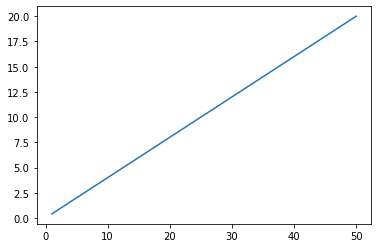

In [3]:
plt.plot(x,y)

In [4]:
np.random.seed(0)

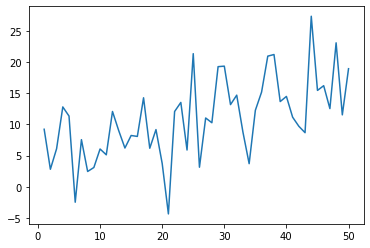

In [5]:
noise = np.random.normal(0,5,50)
noisy_timeseries=y+noise
plt.plot(x,noisy_timeseries)

In [30]:
p=scipy.stats.linregress(np.linspace(1,50,50), y=noisy_timeseries, alternative='two-sided')
trend=p.intercept+p.slope*np.linspace(1,50,50)
change2=np.empty([3000])

from recombinator.block_bootstrap import circular_block_bootstrap

# number of replications for bootstraps (number of resampled time-series to generate)
B = 3000

y_star_cb \
    = circular_block_bootstrap(noisy_timeseries-trend, 
                               block_length=2, 
                               replications=B, replace=True)
bootstrap=[]
for i in range(0,B):
    bootstrap.append(trend+y_star_cb[i,:])

for i in range(0,B):
    change2[i]=(bootstrap[i][45:50].mean()-bootstrap[i][0:5].mean())

print(change2.mean())
print(change2.std())

18.93001702452936
3.417251167940218


In [31]:
p=scipy.stats.linregress(np.linspace(1,50,50), y=noisy_timeseries, alternative='two-sided')
trend=p.intercept+p.slope*np.linspace(1,50,50)
change2=np.empty([3000])

from recombinator.block_bootstrap import circular_block_bootstrap

# number of replications for bootstraps (number of resampled time-series to generate)
B = 3000

y_star_cb \
    = circular_block_bootstrap(noisy_timeseries-trend, 
                               block_length=2, 
                               replications=B, replace=True)
bootstrap=[]
for i in range(0,B):
    bootstrap.append(trend+y_star_cb[i,:])

for i in range(0,B):
    p=scipy.stats.linregress(np.linspace(1,50,50), y=bootstrap[i], alternative='two-sided')
    change2[i]=(p.slope*np.linspace(1,50,50))[-1]

print(change2.mean())
print(change2.std())

20.96507238467062
2.6683819141398972


In [6]:
last5_first5_mean=np.empty([20])
last5_first5_std=np.empty([20])

trend_mean=np.empty([20])
trend_std=np.empty([20])

#Let's loop over random seeds
for j in range(0,20):
    np.random.seed(j)
    x=np.linspace(1,50,50)
    y=2*x
    noise = np.random.normal(0,5,50)
    noisy_timeseries=y+noise
    
    p=scipy.stats.linregress(np.linspace(1,50,50), y=noisy_timeseries, alternative='two-sided')
    trend=p.intercept+p.slope*np.linspace(1,50,50)
    change2=np.empty([3000])

    from recombinator.block_bootstrap import circular_block_bootstrap

    # number of replications for bootstraps (number of resampled time-series to generate)
    B = 3000

    y_star_cb \
        = circular_block_bootstrap(noisy_timeseries-trend, 
                               block_length=2, 
                               replications=B, replace=True)
    bootstrap=[]
    for i in range(0,B):
        bootstrap.append(trend+y_star_cb[i,:])

    for i in range(0,B):
        change2[i]=(bootstrap[i][45:50].mean()-bootstrap[i][0:5].mean())

    last5_first5_mean[j]=change2.mean()
    last5_first5_std[j]=change2.std()
    
    change2=np.empty([3000])


    # number of replications for bootstraps (number of resampled time-series to generate)
    B = 3000

    y_star_cb \
        = circular_block_bootstrap(noisy_timeseries-trend, 
                                   block_length=2, 
                                   replications=B, replace=True)
    bootstrap=[]
    for i in range(0,B):
        bootstrap.append(trend+y_star_cb[i,:])

    for i in range(0,B):
        p=scipy.stats.linregress(np.linspace(1,50,50), y=bootstrap[i], alternative='two-sided')
        change2[i]=(p.slope*np.linspace(1,50,50))[-1]

    trend_mean[j]=change2.mean()
    trend_std[j]=change2.std()

Text(0.5, 1.0, 'Comparing the change from the linear trend vs the change from the last 5 years minus first 5 years')

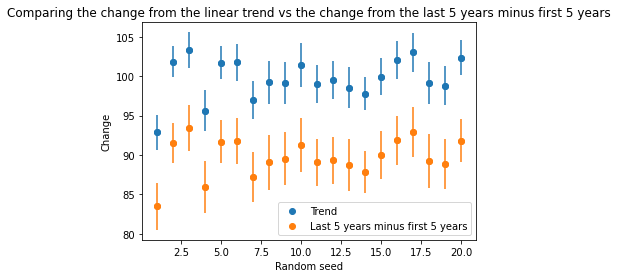

In [8]:
plt.scatter(np.linspace(1,20,20),trend_mean)
plt.errorbar(np.linspace(1,20,20),trend_mean,yerr=trend_std,fmt="o")

plt.scatter(np.linspace(1,20,20),last5_first5_mean)
plt.errorbar(np.linspace(1,20,20),last5_first5_mean,yerr=last5_first5_std,fmt="o")

plt.legend(['Trend','Last 5 years minus first 5 years'])
plt.xlabel('Random seed')
plt.ylabel('Change')
plt.title('Comparing the change from the linear trend vs the change from the last 5 years minus first 5 years')

Text(0.5, 1.0, 'Comparing the change from the linear trend vs the change from the last 5 years minus first 5 years (scaled by time)')

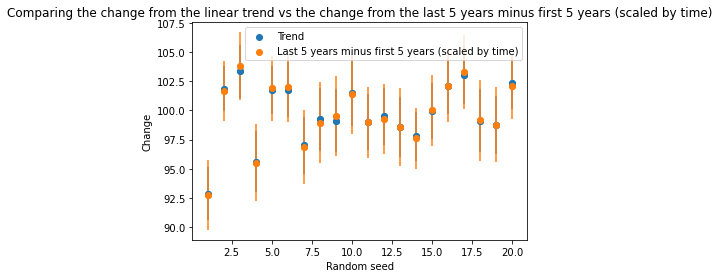

In [9]:
plt.scatter(np.linspace(1,20,20),trend_mean)
plt.errorbar(np.linspace(1,20,20),trend_mean,yerr=trend_std,fmt="o")

plt.scatter(np.linspace(1,20,20),last5_first5_mean*(50/45))
plt.errorbar(np.linspace(1,20,20),last5_first5_mean*(50/45),yerr=last5_first5_std,fmt="o")

plt.legend(['Trend','Last 5 years minus first 5 years (scaled by time)'])
plt.xlabel('Random seed')
plt.ylabel('Change')
plt.title('Comparing the change from the linear trend vs the change from the last 5 years minus first 5 years (scaled by time)')

In [52]:
np.random.seed(0)

In [53]:
noise = np.random.normal(0,5,50)
np.fft.rfft(noise)
print(1/np.fft.rfftfreq(50))

import copy
noise_fft_space=copy.deepcopy(np.fft.rfft(noise))
noise_fft_space[5]=5*np.fft.rfft(noise)[5] #make it bigger at decadal scales
noise_fft_space[0:4]=0.5*np.fft.rfft(noise)[0:4]
noise_fft_space[7:]=0.5*np.fft.rfft(noise)[7:]


[        inf 50.         25.         16.66666667 12.5        10.
  8.33333333  7.14285714  6.25        5.55555556  5.          4.54545455
  4.16666667  3.84615385  3.57142857  3.33333333  3.125       2.94117647
  2.77777778  2.63157895  2.5         2.38095238  2.27272727  2.17391304
  2.08333333  2.        ]


/state/partition1/job-37554380/ipykernel_1746344/3313459805.py:3: RuntimeWarning: divide by zero encountered in true_divide
  print(1/np.fft.rfftfreq(50))


Text(0, 0.5, 'Change')

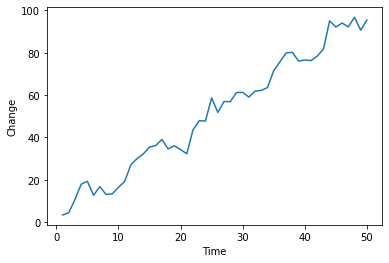

In [54]:
plt.plot(x,y+np.fft.irfft(noise_fft_space))
plt.xlabel('Time')
plt.ylabel('Change')

In [55]:
import copy
last5_first5_mean=np.empty([20])
last5_first5_std=np.empty([20])


trend_mean=np.empty([20])
trend_std=np.empty([20])

#Let's loop over random seeds
for j in range(0,20):
    np.random.seed(j)
    x=np.linspace(1,50,50)
    y=2*x
    noise = np.random.normal(0,5,50)
    np.fft.rfft(noise)
    #print(1/np.fft.rfftfreq(50))

    noise_fft_space=copy.deepcopy(np.fft.rfft(noise))
    noise_fft_space[5]=5*np.fft.rfft(noise)[5] #make it bigger at decadal scales
    noise_fft_space[0:4]=0.5*np.fft.rfft(noise)[0:4]
    noise_fft_space[7:]=0.5*np.fft.rfft(noise)[7:]
    noise_decadal=np.fft.irfft(noise_fft_space)
    noisy_timeseries=y+noise_decadal
    
    p=scipy.stats.linregress(np.linspace(1,50,50), y=noisy_timeseries, alternative='two-sided')
    trend=p.intercept+p.slope*np.linspace(1,50,50)
    change2=np.empty([3000])

    from recombinator.block_bootstrap import circular_block_bootstrap

    # number of replications for bootstraps (number of resampled time-series to generate)
    B = 3000

    y_star_cb \
        = circular_block_bootstrap(noisy_timeseries-trend, 
                               block_length=2, 
                               replications=B, replace=True)
    bootstrap=[]
    for i in range(0,B):
        bootstrap.append(trend+y_star_cb[i,:])

    for i in range(0,B):
        change2[i]=(bootstrap[i][45:50].mean()-bootstrap[i][0:5].mean())

    last5_first5_mean[j]=change2.mean()
    last5_first5_std[j]=change2.std()
    
    change2=np.empty([3000])


    # number of replications for bootstraps (number of resampled time-series to generate)
    B = 3000

    y_star_cb \
        = circular_block_bootstrap(noisy_timeseries-trend, 
                                   block_length=2, 
                                   replications=B, replace=True)
    bootstrap=[]
    for i in range(0,B):
        bootstrap.append(trend+y_star_cb[i,:])

    for i in range(0,B):
        p=scipy.stats.linregress(np.linspace(1,50,50), y=bootstrap[i], alternative='two-sided')
        change2[i]=(p.slope*np.linspace(1,50,50))[-1]

    trend_mean[j]=change2.mean()
    trend_std[j]=change2.std()


Text(0.5, 1.0, 'Time series with decadal variability \n Compare change from linear trend and the last 5 years minus first 5 years')

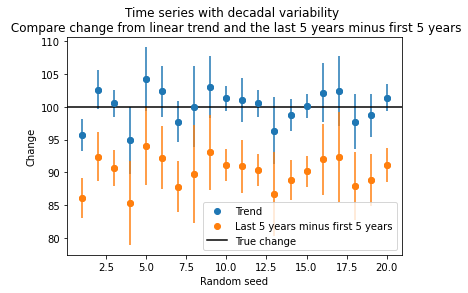

In [58]:
plt.scatter(np.linspace(1,20,20),trend_mean)
plt.errorbar(np.linspace(1,20,20),trend_mean,yerr=trend_std,fmt="o")

plt.scatter(np.linspace(1,20,20),last5_first5_mean)
plt.errorbar(np.linspace(1,20,20),last5_first5_mean,yerr=last5_first5_std,fmt="o")
plt.axhline(y=100, color='k', linestyle='-')


plt.legend(['Trend','Last 5 years minus first 5 years','True change'])
plt.xlabel('Random seed')
plt.ylabel('Change')
plt.title('Time series with decadal variability \n Compare change from linear trend and the last 5 years minus first 5 years')

Text(0.5, 1.0, 'Time series with decadal variability \n Compare change from linear trend and the last 5 years minus first 5 years')

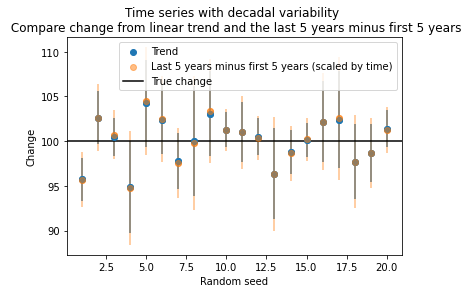

In [60]:
plt.scatter(np.linspace(1,20,20),trend_mean)
plt.errorbar(np.linspace(1,20,20),trend_mean,yerr=trend_std,fmt="o")

plt.scatter(np.linspace(1,20,20),last5_first5_mean*(50/45),alpha=0.5)
plt.errorbar(np.linspace(1,20,20),last5_first5_mean*(50/45),yerr=last5_first5_std,fmt="o",alpha=0.5)
plt.axhline(y=100, color='k', linestyle='-')

plt.legend(['Trend','Last 5 years minus first 5 years (scaled by time)','True change'])
plt.xlabel('Random seed')
plt.ylabel('Change')
plt.title('Time series with decadal variability \n Compare change from linear trend and the last 5 years minus first 5 years')

In [62]:
import copy
last5_first5_mean=np.empty([20])
last5_first5_std=np.empty([20])


trend_mean=np.empty([20])
new_std=np.empty([20])

#Let's loop over random seeds
for j in range(0,20):
    np.random.seed(j)
    x=np.linspace(1,50,50)
    y=2*x
    noise = np.random.normal(0,5,50)
    np.fft.rfft(noise)
    #print(1/np.fft.rfftfreq(50))

    noise_fft_space=copy.deepcopy(np.fft.rfft(noise))
    noise_fft_space[5]=5*np.fft.rfft(noise)[5] #make it bigger at decadal scales
    noise_fft_space[0:4]=0.5*np.fft.rfft(noise)[0:4]
    noise_fft_space[7:]=0.5*np.fft.rfft(noise)[7:]
    noise_decadal=np.fft.irfft(noise_fft_space)
    noisy_timeseries=y+noise_decadal
    
    p=scipy.stats.linregress(np.linspace(1,50,50), y=noisy_timeseries, alternative='two-sided')
    trend=p.intercept+p.slope*np.linspace(1,50,50)
    change2=np.empty([3000])

    from recombinator.block_bootstrap import circular_block_bootstrap

    # number of replications for bootstraps (number of resampled time-series to generate)
    B = 3000

    y_star_cb \
        = circular_block_bootstrap(noisy_timeseries-trend, 
                               block_length=2, 
                               replications=B, replace=True)
    bootstrap=[]
    for i in range(0,B):
        bootstrap.append(trend+y_star_cb[i,:])

    for i in range(0,B):
        change2[i]=(bootstrap[i][45:50].mean()-bootstrap[i][0:5].mean())

    last5_first5_mean[j]=change2.mean()
    last5_first5_std[j]=change2.std()
    
    change2=np.empty([3000])
    individual_variance=np.empty([3000])


    # number of replications for bootstraps (number of resampled time-series to generate)
    B = 3000

    y_star_cb \
        = circular_block_bootstrap(noisy_timeseries-trend, 
                                   block_length=2, 
                                   replications=B, replace=True)
    bootstrap=[]
    for i in range(0,B):
        bootstrap.append(trend+y_star_cb[i,:])

    for i in range(0,B):
        p=scipy.stats.linregress(np.linspace(1,50,50), y=bootstrap[i], alternative='two-sided')
        change2[i]=(p.slope*np.linspace(1,50,50))[-1]
        individual_variance[i]=(p.stderr*50)**2
        

    new_std[j]=np.sqrt((change2-change2.mean())**2+individual_variance).mean()
    trend_mean[j]=change2.mean()


Text(0.5, 1.0, 'Time series with decadal variability \n Compare change from linear trend and the last 5 years minus first 5 years')

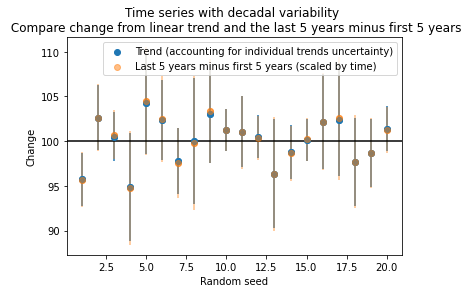

In [63]:
plt.scatter(np.linspace(1,20,20),trend_mean)
plt.errorbar(np.linspace(1,20,20),trend_mean,yerr=new_std,fmt="o")

plt.scatter(np.linspace(1,20,20),last5_first5_mean*(50/45),alpha=0.5)
plt.errorbar(np.linspace(1,20,20),last5_first5_mean*(50/45),yerr=last5_first5_std,fmt="o",alpha=0.5)
plt.axhline(y=100, color='k', linestyle='-')

plt.legend(['Trend','Last 5 years minus first 5 years','True trend'])

plt.legend(['Trend (accounting for individual trends uncertainty)','Last 5 years minus first 5 years (scaled by time)'])
plt.xlabel('Random seed')
plt.ylabel('Change')
plt.title('Time series with decadal variability \n Compare change from linear trend and the last 5 years minus first 5 years')

In [98]:
import copy
last5_first5_mean=np.empty([20])
last5_first5_std=np.empty([20])


trend_mean=np.empty([20])
new_std2=np.empty([20])

#Let's loop over random seeds
for j in range(0,20):
    np.random.seed(j)
    x=np.linspace(1,50,50)
    y=2*x
    noise = np.random.normal(0,5,50)
    noise = np.random.normal(0,5,50)
    np.fft.rfft(noise)
    #print(1/np.fft.rfftfreq(50))

    noise_fft_space=copy.deepcopy(np.fft.rfft(noise))
    noise_fft_space[5]=2*np.fft.rfft(noise)[5] #make it bigger at decadal scales
    noise_fft_space[0:4]=0.5*np.fft.rfft(noise)[0:4]
    noise_fft_space[7:]=0.5*np.fft.rfft(noise)[7:]
    noise_decadal=np.fft.irfft(noise_fft_space)
    noisy_timeseries=y+noise_decadal
    
    p=scipy.stats.linregress(np.linspace(1,50,50), y=noisy_timeseries, alternative='two-sided')
    trend=p.intercept+p.slope*np.linspace(1,50,50)
    change2=np.empty([3000])

    from recombinator.block_bootstrap import circular_block_bootstrap

    # number of replications for bootstraps (number of resampled time-series to generate)
    B = 3000

    y_star_cb \
        = circular_block_bootstrap(noisy_timeseries-trend, 
                               block_length=2, 
                               replications=B, replace=True)
    bootstrap=[]
    for i in range(0,B):
        bootstrap.append(trend+y_star_cb[i,:])

    for i in range(0,B):
        change2[i]=(bootstrap[i][45:50].mean()-bootstrap[i][0:5].mean())

    last5_first5_mean[j]=change2.mean()
    last5_first5_std[j]=change2.std()
    
    change2=np.empty([3000])
    individual_variance=np.empty([3000])


    # number of replications for bootstraps (number of resampled time-series to generate)
    B = 3000

    y_star_cb \
        = circular_block_bootstrap(noisy_timeseries-trend, 
                                   block_length=2, 
                                   replications=B, replace=True)
    bootstrap=[]
    for i in range(0,B):
        bootstrap.append(trend+y_star_cb[i,:])

    for i in range(0,B):
        p=scipy.stats.linregress(np.linspace(1,50,50), y=bootstrap[i], alternative='two-sided')
        change2[i]=(p.slope*np.linspace(1,50,50))[-1]
        individual_variance[i]=(p.stderr*50)**2
        

    new_std2[j]=np.sqrt((individual_variance).mean()+(change2**2).mean()-(change2.mean())**2)
    trend_mean[j]=change2.mean()


In [29]:
import copy
last5_first5_mean=np.empty([20])
last5_first5_std=np.empty([20])


trend_mean=np.empty([20])
new_std2=np.empty([20])
new_std=np.empty([20])

#Let's loop over random seeds
for j in range(0,20):
    np.random.seed(j)
    x=np.linspace(1,50,50)
    y=2*x
    noise = np.random.normal(0,5,50)
    noise = np.random.normal(0,5,50)
    np.fft.rfft(noise)
    #print(1/np.fft.rfftfreq(50))

    noise_fft_space=copy.deepcopy(np.fft.rfft(noise))
    noise_fft_space[5]=2*np.fft.rfft(noise)[5] #make it bigger at decadal scales
    noise_fft_space[0:4]=0.5*np.fft.rfft(noise)[0:4]
    noise_fft_space[7:]=0.5*np.fft.rfft(noise)[7:]
    noise_decadal=np.fft.irfft(noise_fft_space)
    noisy_timeseries=y+noise_decadal
    
    p=scipy.stats.linregress(np.linspace(1,50,50), y=noisy_timeseries, alternative='two-sided')
    trend=p.intercept+p.slope*np.linspace(1,50,50)
    change2=np.empty([3000])

    from recombinator.block_bootstrap import circular_block_bootstrap

    # number of replications for bootstraps (number of resampled time-series to generate)
    B = 3000

    y_star_cb \
        = circular_block_bootstrap(noisy_timeseries-trend, 
                               block_length=2, 
                               replications=B, replace=True)
    bootstrap=[]
    for i in range(0,B):
        bootstrap.append(trend+y_star_cb[i,:])

    for i in range(0,B):
        change2[i]=(bootstrap[i][45:50].mean()-bootstrap[i][0:5].mean())

    last5_first5_mean[j]=change2.mean()
    last5_first5_std[j]=change2.std()
    
    change2=np.empty([3000])
    individual_variance=np.empty([3000])


    # number of replications for bootstraps (number of resampled time-series to generate)
    B = 3000

    y_star_cb \
        = circular_block_bootstrap(noisy_timeseries-trend, 
                                   block_length=2, 
                                   replications=B, replace=True)
    bootstrap=[]
    for i in range(0,B):
        bootstrap.append(trend+y_star_cb[i,:])

    for i in range(0,B):
        p=scipy.stats.linregress(np.linspace(1,50,50), y=bootstrap[i], alternative='two-sided')
        change2[i]=(p.slope*np.linspace(1,50,50))[-1]
        individual_variance[i]=(p.stderr*50)**2
        

    new_std2[j]=np.sqrt((individual_variance+change2**2).mean()-(change2.mean())**2)
    new_std[j]=np.sqrt(((change2-change2.mean())**2+individual_variance).mean())
    trend_mean[j]=change2.mean()


In [31]:
new_std2

array([1.69221831, 2.20017363, 1.97847721, 3.36007457, 2.29233607,
       2.25251422, 2.4606721 , 2.30560553, 3.08988756, 2.57101728,
       2.29699219, 2.76244901, 2.95639557, 2.7373397 , 3.69161707,
       2.65594726, 1.83988397, 2.56901263, 2.6825836 , 2.83736481])

In [30]:
new_std

array([1.69221831, 2.20017363, 1.97847721, 3.36007457, 2.29233607,
       2.25251422, 2.4606721 , 2.30560553, 3.08988756, 2.57101728,
       2.29699219, 2.76244901, 2.95639557, 2.7373397 , 3.69161707,
       2.65594726, 1.83988397, 2.56901263, 2.6825836 , 2.83736481])

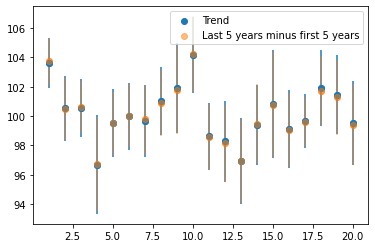

In [33]:
plt.scatter(np.linspace(1,20,20),trend_mean)
plt.errorbar(np.linspace(1,20,20),trend_mean,yerr=new_std,fmt="o")

plt.scatter(np.linspace(1,20,20),last5_first5_mean*(50/45),alpha=0.5)
plt.errorbar(np.linspace(1,20,20),last5_first5_mean*(50/45),yerr=last5_first5_std,fmt="o",alpha=0.5)

plt.legend(['Trend','Last 5 years minus first 5 years'])